In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_name=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
data = pd.read_csv(url,names=col_name,na_values="?")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# EDA

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
data['thal']=data['thal'].fillna(data['thal'].mean())

In [8]:
data['ca']=data['ca'].fillna(data['ca'].mean())

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualization

In [10]:
a=data.groupby('sex')['sex'].count()

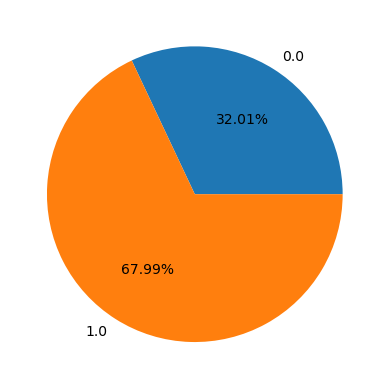

In [11]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.show()

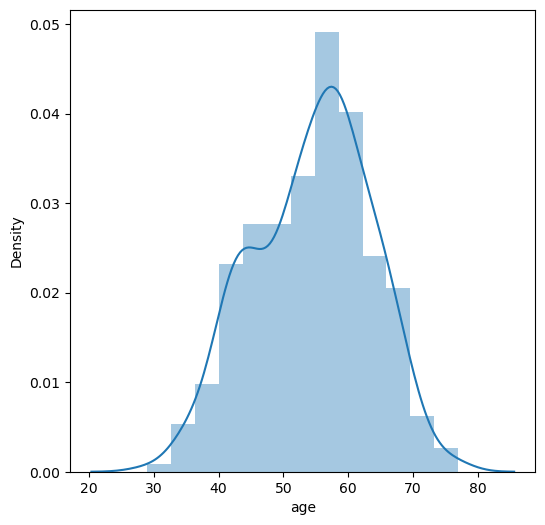

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.show()

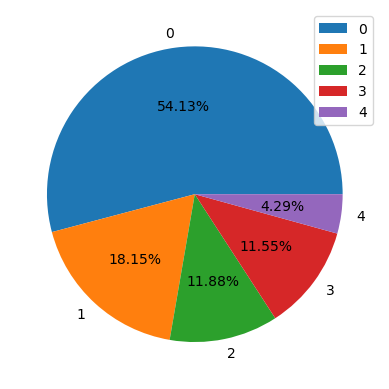

In [13]:
a=data.groupby('target')['target'].count()
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.legend()
plt.show()

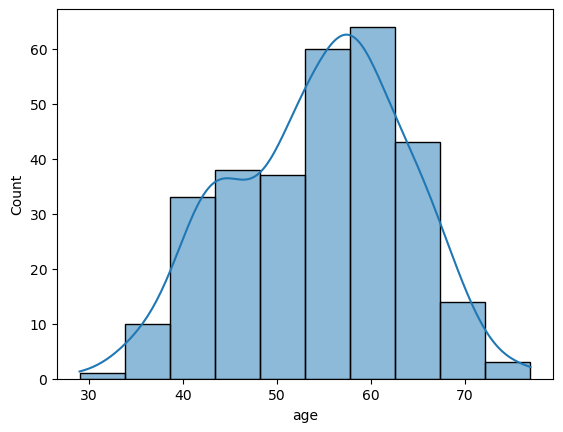

In [14]:
sns.histplot(data["age"],bins=10,kde=True)
plt.show()

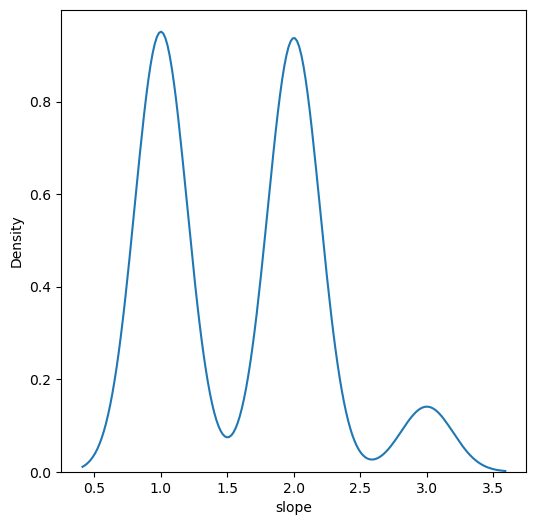

In [15]:
plt.figure(figsize=(6,6))
sns.kdeplot(data['slope'])
plt.show()

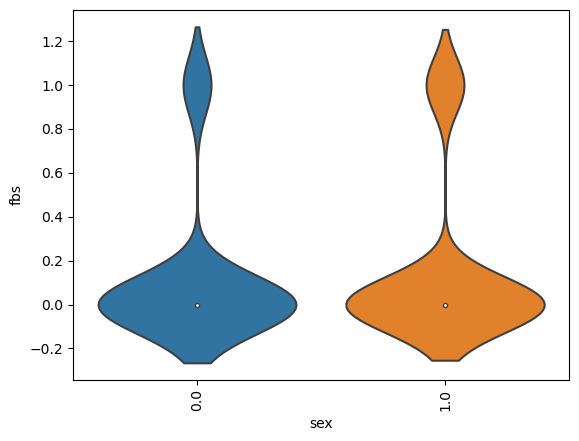

In [16]:
sns.violinplot(x="sex",y="fbs",data=data)
plt.xticks(rotation=90)
plt.show()

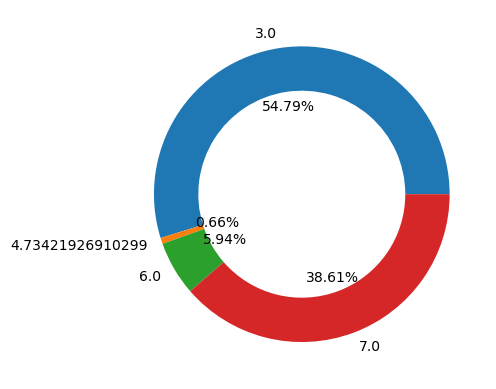

In [17]:
b=data.groupby('thal')['thal'].count()
plt.pie(b,labels=b.index,autopct="%.2f%%",wedgeprops=dict(width=0.3))
plt.show()

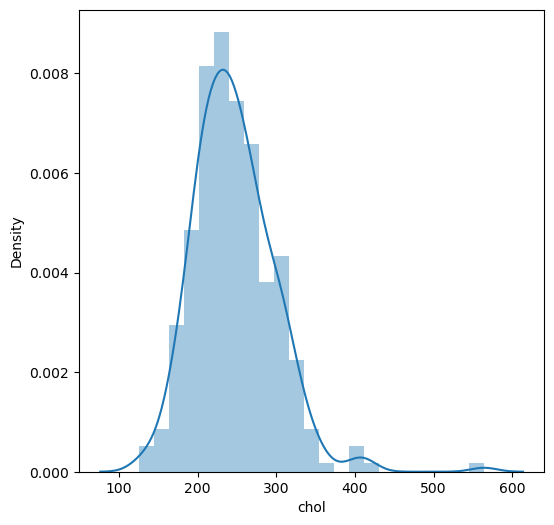

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(data['chol'])
plt.show()

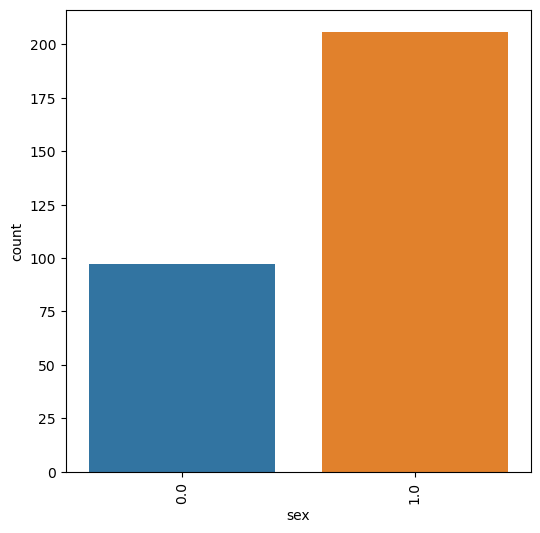

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='chol'>

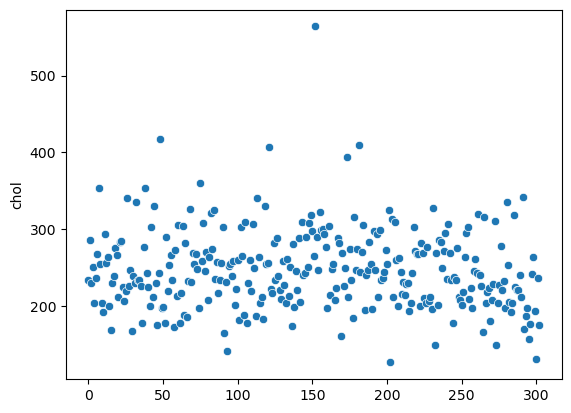

In [20]:
sns.scatterplot(data.chol)

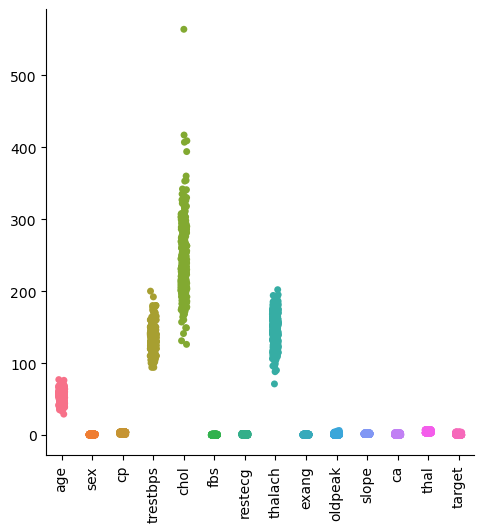

In [21]:
sns.catplot(data=data)
plt.xticks(rotation=90)
plt.show()

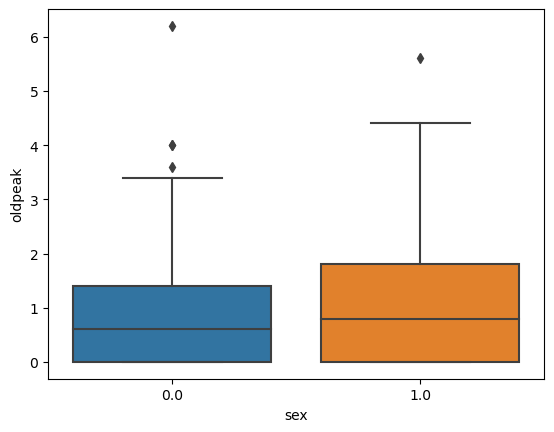

In [22]:
sns.boxplot(x='sex',y='oldpeak',data=data)
plt.show()

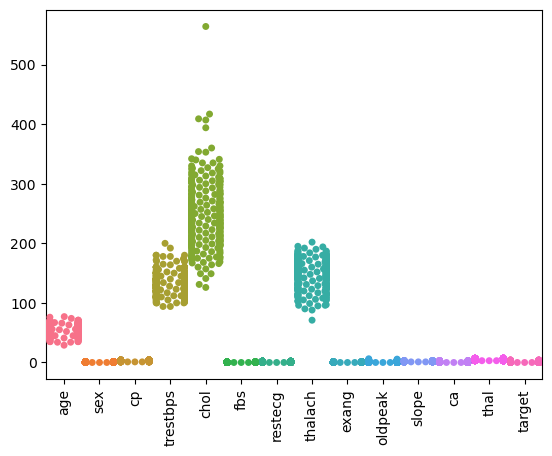

In [23]:
sns.swarmplot(data=data)
plt.xticks(rotation=90)
plt.show()

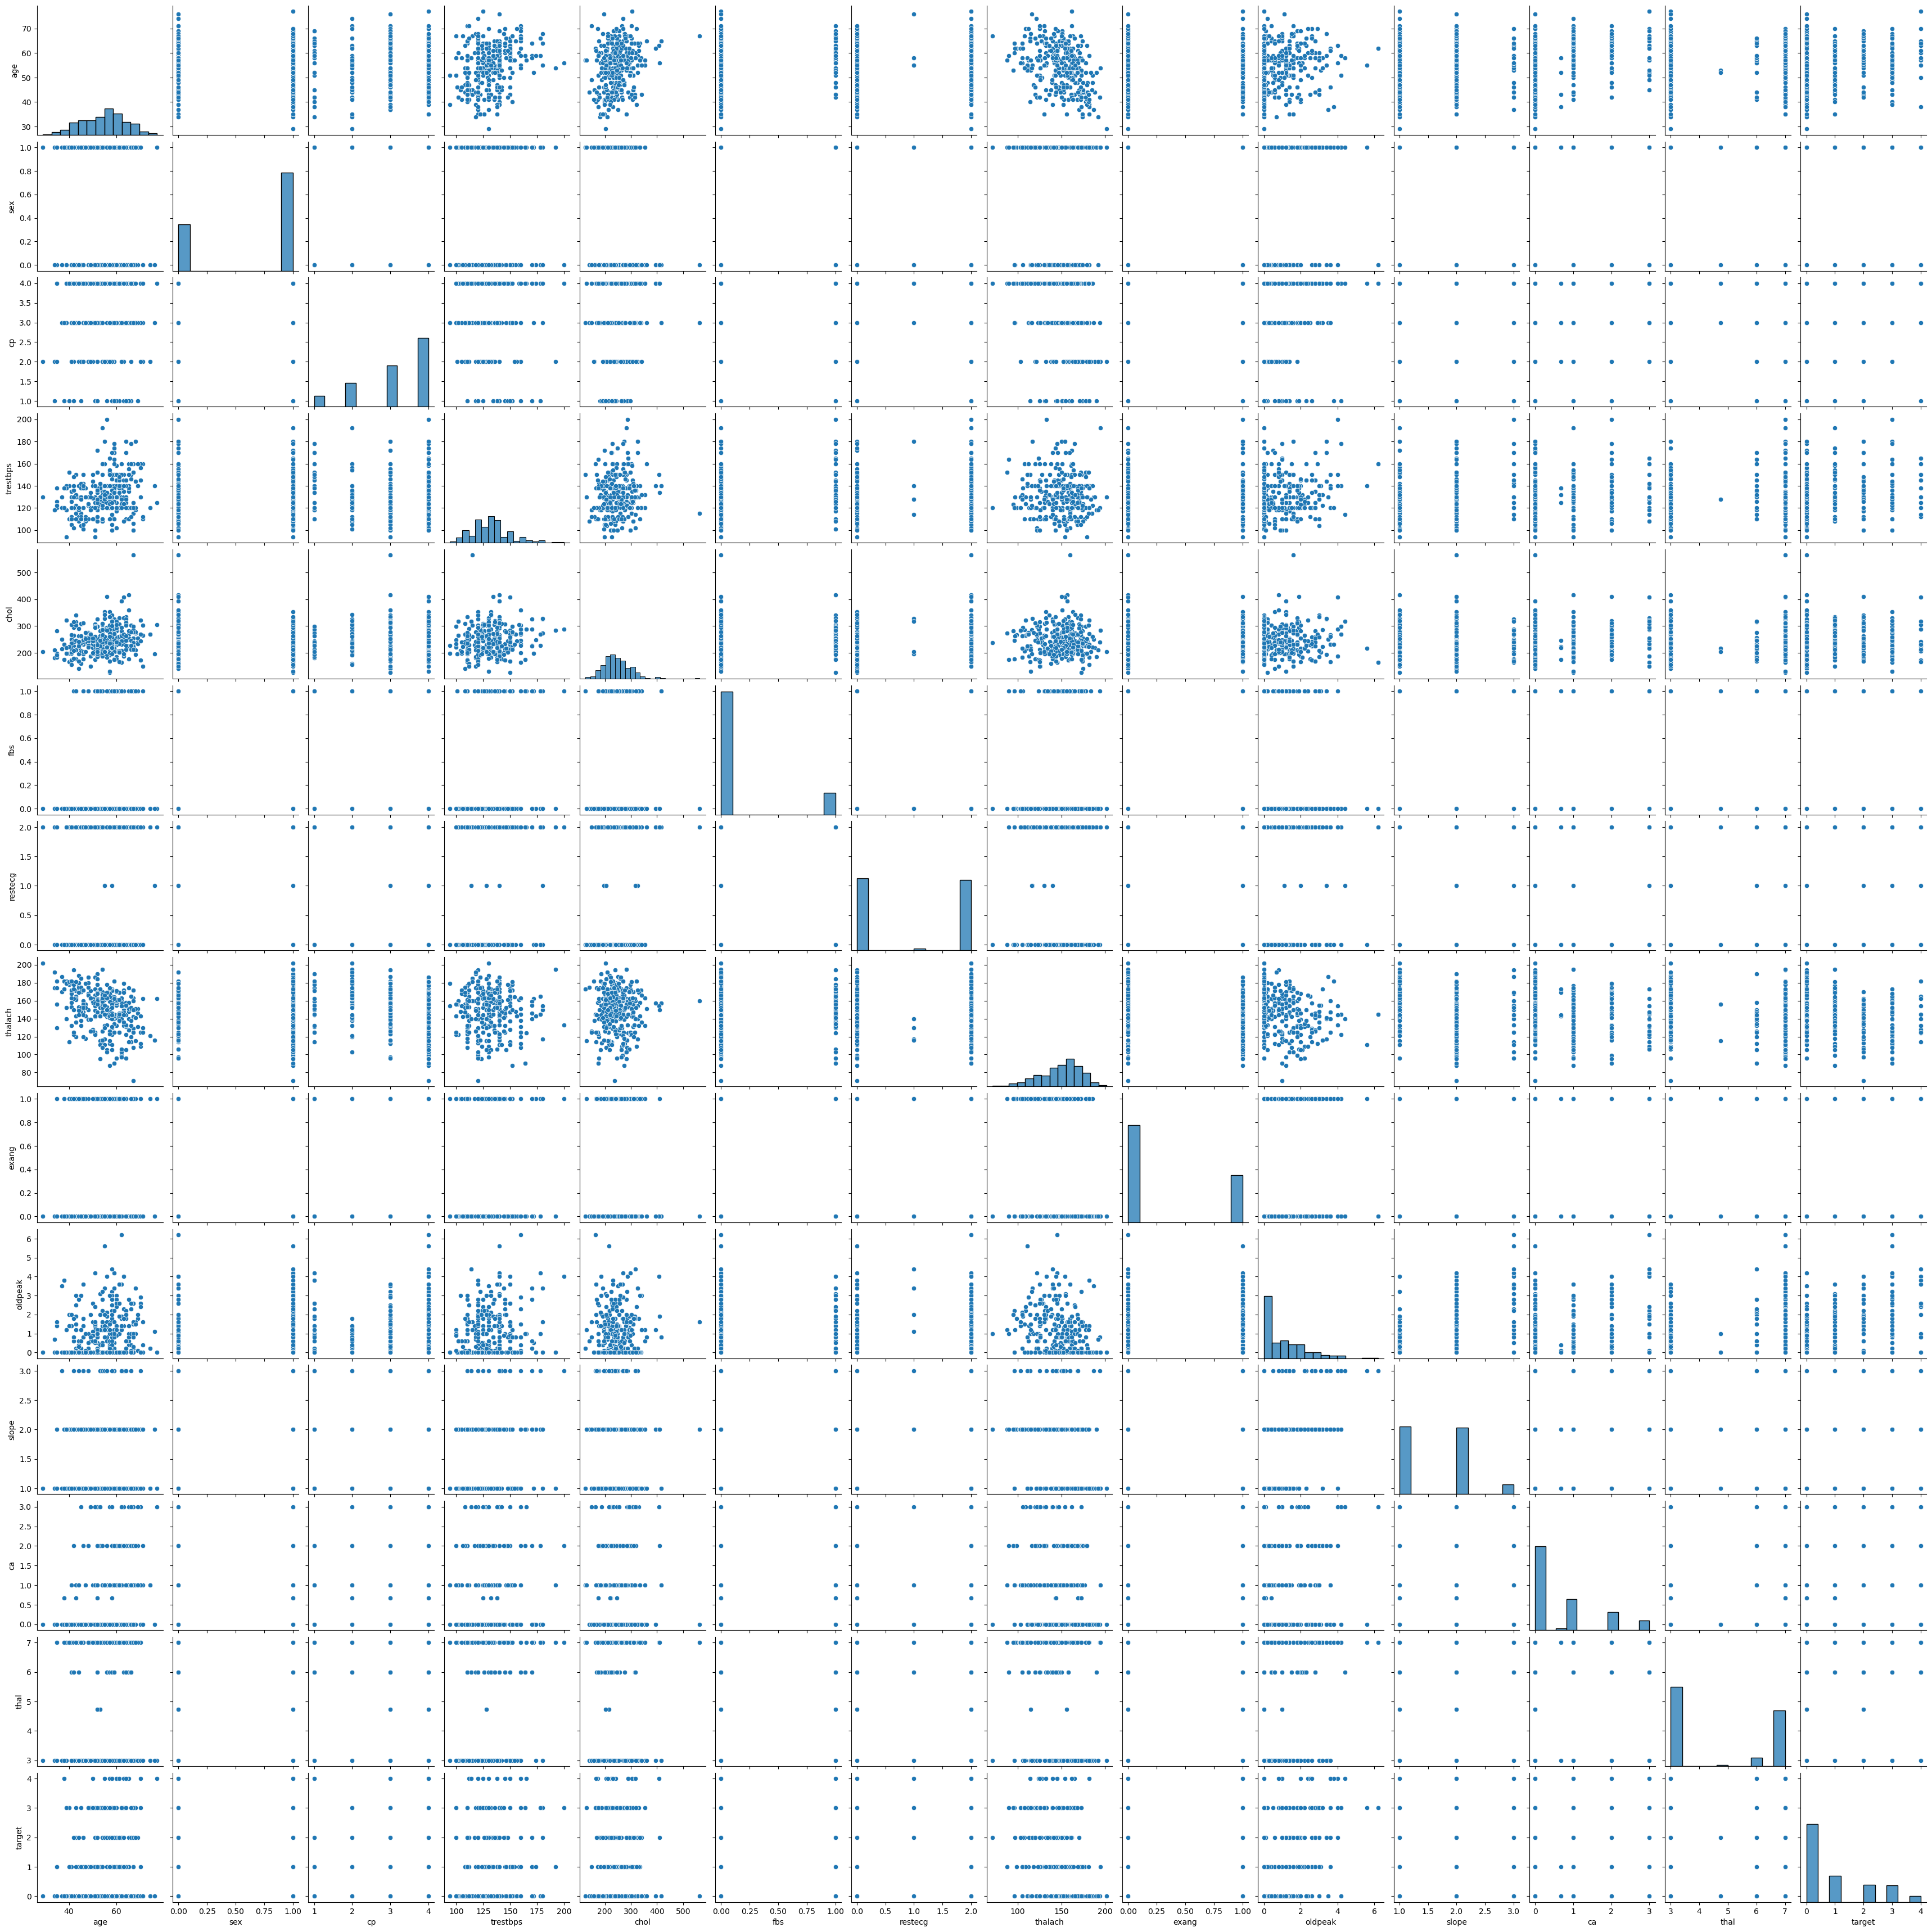

In [24]:
sns.pairplot(data=data)
plt.show()

<Axes: xlabel='age', ylabel='sex'>

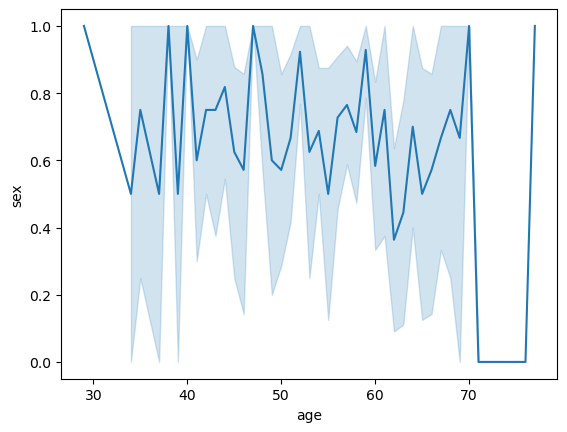

In [25]:
sns.lineplot(x='age', y='sex', data=data)

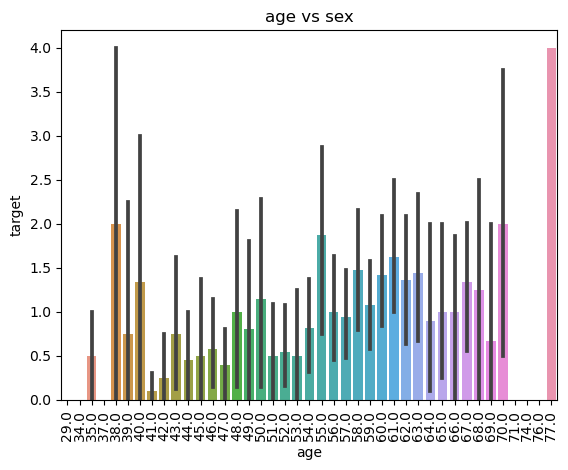

In [26]:
sns.barplot(y='target', x='age',data=data, orient='v')
plt.title ('age vs sex')
plt.xticks(rotation=90)
plt.show()

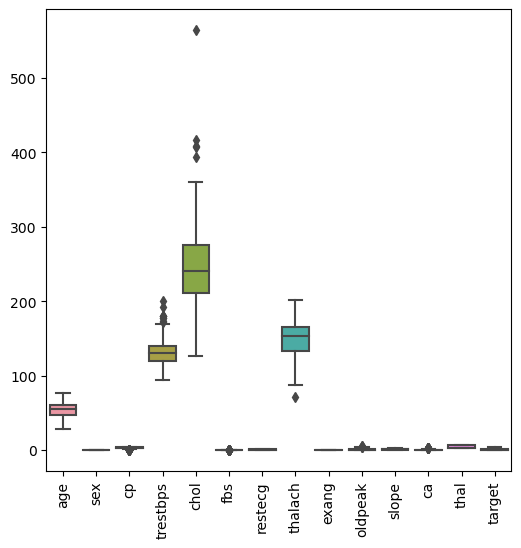

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

## Outkier Detection

In [28]:
def remove_outlier_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col]<upper_bound)]

In [29]:
imp_col =['trestbps','thalach','chol']

In [30]:
for col in imp_col:
    data= remove_outlier_IQR(data,col)

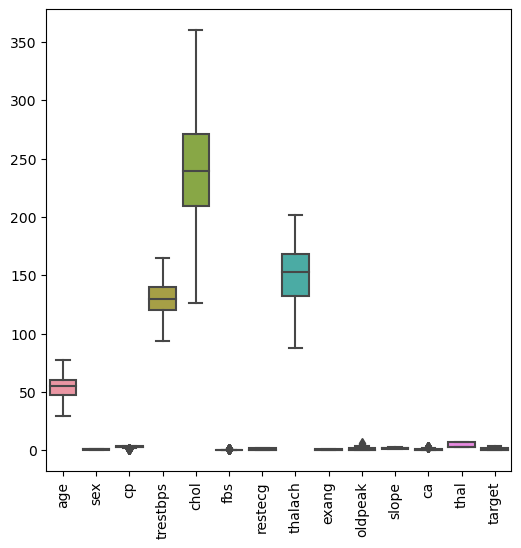

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [32]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


# Train Test Split

In [33]:
x=data.drop('target',axis=1)
y=data['target']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,0.672241,7.0
26,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.000000,3.0
90,66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.000000,3.0
151,42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.000000,3.0
144,58.0,1.0,3.0,105.0,240.0,0.0,2.0,154.0,1.0,0.6,2.0,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.000000,7.0
74,44.0,1.0,4.0,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1.0,1.000000,3.0
110,61.0,0.0,4.0,145.0,307.0,0.0,2.0,146.0,1.0,1.0,2.0,0.000000,7.0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.000000,3.0


In [36]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.000000,7.0
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.000000,7.0
165,57.0,1.0,4.0,132.0,207.0,0.0,0.0,168.0,1.0,0.0,1.0,0.000000,7.0
224,63.0,0.0,4.0,108.0,269.0,0.0,0.0,169.0,1.0,1.8,2.0,2.000000,3.0
78,48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.000000,3.0
249,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.000000,3.0
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.000000,3.0
180,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.000000,7.0
43,59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.000000,3.0
241,41.0,0.0,2.0,126.0,306.0,0.0,0.0,163.0,0.0,0.0,1.0,0.000000,3.0


In [37]:
y_train

287    0
26     0
90     0
151    0
144    0
      ..
202    0
74     1
110    1
289    0
106    2
Name: target, Length: 227, dtype: int64

In [81]:
y_test

9      1
270    1
165    0
224    1
78     0
249    0
281    0
180    3
43     0
241    0
47     4
284    2
150    0
178    0
5      0
233    0
247    1
147    0
162    0
34     0
113    2
62     1
71     3
234    0
58     0
97     3
80     0
294    1
291    0
112    0
264    4
166    0
177    1
46     0
82     0
223    3
69     1
86     0
192    1
199    1
31     2
23     3
25     0
138    1
76     1
217    0
240    0
262    0
94     0
218    0
279    0
187    2
96     2
6      3
132    0
271    0
301    1
Name: target, dtype: int64

# Feature Engineering

In [39]:
scale=StandardScaler()
s_train = scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# Decision Tree

In [40]:
classi = DecisionTreeClassifier(random_state = 15)
classi.fit(x_train,y_train)

DecisionTreeClassifier(random_state=15)

In [41]:
y_pred = classi.predict(x_test)

In [42]:
acc = accuracy_score(y_test,y_pred)

In [43]:
print(f"Accuracy:{acc:.2f}")

Accuracy:0.56


In [44]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.94      0.79        31
           1       0.27      0.23      0.25        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        57
   macro avg       0.19      0.23      0.21        57
weighted avg       0.44      0.56      0.49        57



## AUC-ROC Curve

In [45]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [46]:
yb = label_binarize(y,classes=[0,1,2,3,4]) 

In [47]:
yb

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [48]:
nc=yb.shape[1]

In [49]:
nc

5

In [50]:
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

In [51]:
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

In [52]:
fpr = dict()
tpr= dict()
roc_auc= dict()


for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score[:,i])
    roc_auc[i]= auc(fpr[i],tpr[i])

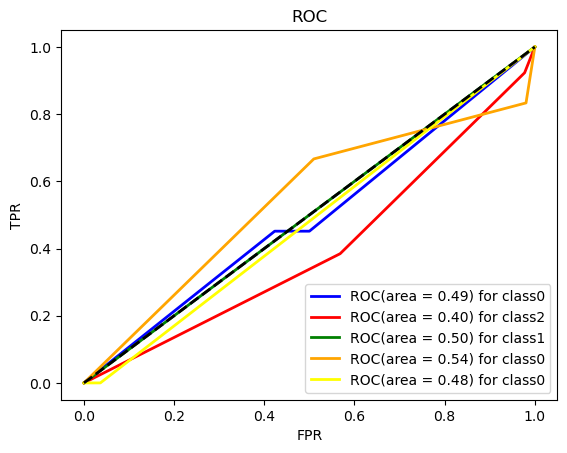

In [53]:
plt.figure()
color=['blue','red','green','orange','yellow']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color,lw=2, label = 'ROC(area = {:.2f}) for class{}'.format(roc_auc[i],data.target[i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

In [54]:
#param_grid = {
  #  'n_estimator':[5,10,50,100,150,200],
  #  'max_depth':[None,2,5,10,20],
   # 'min_sample_split':[2,3,5,8,10],
   # 'min_sample_leaf':[1,2,4,5,7]
#}

# SVM

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for svm=0.5550660792951542
Accuracy for testing set for svm=2.210526315789474


# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for svm=0.5198237885462555
Accuracy for testing set for svm=2.0701754385964914


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for svm=0.5638766519823789
Accuracy for testing set for svm=2.245614035087719


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)

print()
print("Accuracy for training set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for svm={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for svm=0.5594713656387665
Accuracy for testing set for svm=2.2280701754385963


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
res = r2_score(y_test, y_pred)

print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R2 Score = ',res)

Mean Absolute Error =  1.3114743363930783
Mean Squared Error =  2.469797991549732
Root Mean Squared Error =  1.5715590957866432
R2 Score =  -0.8312126139993332


## Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)


mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
res= r2_score(y_test, y_pred)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R2 Score = ',res)

Mean Absolute Error =  0.6666666666666666
Mean Squared Error =  1.368421052631579
Root Mean Squared Error =  1.1697953037312037
R2 Score =  -0.014605203103605469


## Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
res = r2_score(y_test, y_pred)


mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R2 Score = ',res)

Mean Absolute Error =  0.7629824561403509
Mean Squared Error =  0.9793350877192981
Root Mean Squared Error =  0.9896136052618204
R2 Score =  0.27387957553628506


## XGBoost

In [62]:
import xgboost as xgb


model=xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
res= r2_score(y_test,y_pred)


print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R2 Score = ',res)

Mean Absolute Error =  0.9713677170506695
Mean Squared Error =  1.893151052111397
Root Mean Squared Error =  1.3759182577869213
R2 Score =  -0.4036622018050955


### Tuning

In [63]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt_model , x, y , cv=5 , scoring='r2') # For Decision Tree
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [ 3.08567096e-01  2.51712329e-01 -1.58077774e-04  2.20899471e-01
 -6.27054060e-01] 0.03079335153736009 0.3452028368593273


In [64]:
# for Random Forest
score = cross_val_score(rf_model, x, y, cv=5, scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [0.54936617 0.46457414 0.46840967 0.59308836 0.41263882] 0.49761543286026183 0.06474402886772998


In [65]:
#XGBoost
score = cross_val_score(model, x, y, cv=5, scoring='r2')
print('cross_val_score: ',score , score.mean() , score.std())

cross_val_score:  [0.43439938 0.14279415 0.35796673 0.40620812 0.25889188] 0.32005205107657553 0.10686124788410577


### L1 and L2

In [66]:
from sklearn.linear_model import Ridge,Lasso


ridge_model=Ridge(alpha=1.0)
ridge_score=cross_val_score(ridge_model,x_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error
print(ridge_score)

[0.57579498 0.58749293 0.65040679 0.36818876 0.26865543]


In [67]:
lasso_model=Lasso(alpha=1.0)
lasso_score= cross_val_score(lasso_model,x_train,y_train,cv=5) # use scoring method f1_macro or neg_mean_squared_error


lr_model.fit(x_train,y_train)
lr_prediction=lr_model.predict(x_test)
lr_mae=mean_absolute_error(y_test,lr_prediction)
lr_mse=mean_squared_error(y_test,lr_prediction)
lr_r2=r2_score(y_test,lr_prediction)


print('Linear MAE',lr_mae)
print("Linear MSE",lr_mse)
print('Linear R2',lr_r2)

Linear MAE 1.3114743363930783
Linear MSE 2.469797991549732
Linear R2 -0.8312126139993332


In [68]:
lasso_model.fit(x_train,y_train)
lasso_prediction=lasso_model.predict(x_test)
lasso_mae=mean_absolute_error(y_test,lasso_prediction)
lassso_mse=mean_squared_error(y_test,lasso_prediction)
lasso_r2=r2_score(y_test,lasso_prediction)


print('Lasso MAE',lasso_mae)
print("Lasso MSE",lassso_mse)
print('Lasso R2',lasso_r2)

Lasso MAE 2.8014146839468803
Lasso MSE 9.048884083712306
Lasso R2 -5.7092250999500855


In [69]:
ridge_model.fit(x_train,y_train)
ridge_prediction=lasso_model.predict(x_test)
ridge_mae=mean_absolute_error(y_test,lasso_prediction)
ridge_mse=mean_squared_error(y_test,lasso_prediction)
ridge_r2=r2_score(y_test,lasso_prediction)


print('Ridge MAE',ridge_mae)
print("Ridge MSE",ridge_mse)
print('Ridge R2',ridge_r2)

Ridge MAE 2.8014146839468803
Ridge MSE 9.048884083712306
Ridge R2 -5.7092250999500855


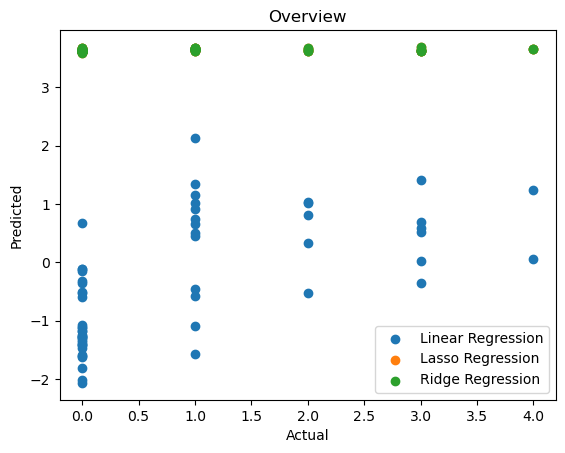

In [70]:
#plot for all
plt.scatter(y_test, lr_prediction,alpha=1.0,label="Linear Regression")
plt.scatter(y_test, lasso_prediction,alpha=1.0,label="Lasso Regression")
plt.scatter(y_test, ridge_prediction,alpha=1.0,label="Ridge Regression")


plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')
plt.legend()
plt.show()

### Grid Search CV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [73]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='r2')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [74]:
best_params = grid_search.best_params_

In [75]:
best_model = xgb.XGBRegressor(**best_params)

In [76]:
best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred = best_model.predict(x_test)

In [78]:
r2=r2_score(y_test,y_pred)
print(r2)

0.1561659678764522


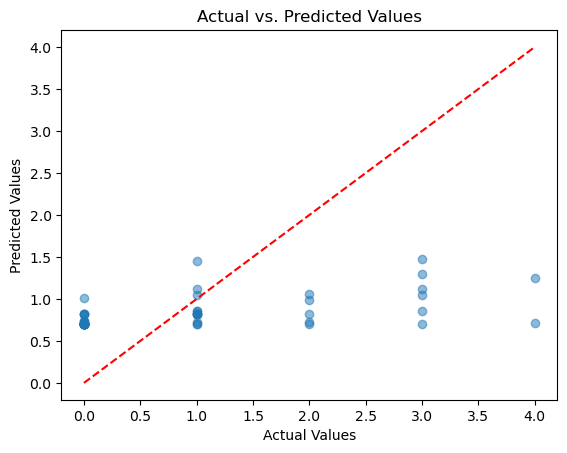

In [79]:
plt.scatter(y_test,y_pred, alpha = 0.5)


plt.plot([min(y_test),max(y_test)], [ min(y_test), max(y_test)], 'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted Values')
plt.show()